In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

In [2]:
df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7f222d29-d6b7-4a3e-882d-e93a59bd7d83',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if have to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index = True)

    # To create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [3]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [4]:
# df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
# df72

In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12198,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.987106e+07,1.987106e+07,...,62.6944,2.278943e+12,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
1,1027,Ethereum,ETH,ethereum,10316,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207252e+08,1.207252e+08,...,9.3766,3.225165e+11,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
2,825,Tether USDt,USDT,tether,129964,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.529134e+11,1.560043e+11,...,4.4474,1.560627e+11,None,2025-05-28T13:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-28 19:31:19.307690
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.868601e+10,9.998611e+10,...,3.9263,2.301232e+11,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
4,1839,BNB,BNB,bnb,2553,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408879e+08,1.408879e+08,...,2.8144,9.680260e+10,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
5,5426,Solana,SOL,solana,927,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.205268e+08,6.018278e+08,...,2.6325,1.046910e+11,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
6,3408,USDC,USDC,usd-coin,28281,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.138396e+10,6.138396e+10,...,1.7840,6.136222e+10,None,2025-05-28T13:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-28 19:31:19.307690
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.494509e+11,1.494509e+11,...,0.9685,3.331200e+10,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
8,2010,Cardano,ADA,cardano,1524,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.533451e+10,4.499450e+10,...,0.7791,3.412753e+10,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690
9,1958,TRON,TRX,tron,1181,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.487200e+10,9.487205e+10,...,0.7592,2.611449e+10,None,2025-05-28T13:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:31:19.307690


In [ ]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12198,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19871056.00000,19871056.00000,...,62.85990,2283044628335.27002,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
1,1027,Ethereum,ETH,ethereum,10316,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120725247.07261,120725247.07261,...,9.35850,321622906477.00000,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
2,825,Tether USDt,USDT,tether,129964,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,152913418919.93286,156004270711.01822,...,4.45080,156053226943.37000,None,2025-05-28T13:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-05-28 19:09:14.422573
3,52,XRP,XRP,xrp,1617,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,58686007292.00000,99986107098.00000,...,3.93100,230204874442.10999,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
4,1839,BNB,BNB,bnb,2553,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,140887900.00000,140887900.00000,...,2.81610,96780049100.42000,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
5,5426,Solana,SOL,solana,927,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,520526933.41375,601827800.13479,...,2.63150,104562042611.03999,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
6,3408,USDC,USDC,usd-coin,28281,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,61379922073.50623,61379922073.50623,...,1.78560,61366641955.24000,None,2025-05-28T13:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-05-28 19:09:14.422573
7,74,Dogecoin,DOGE,dogecoin,1229,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,149450576383.70523,149450566383.70523,...,0.96850,33283932498.90000,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
8,2010,Cardano,ADA,cardano,1524,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35334514487.46726,44994495302.31451,...,0.77950,34115774270.99000,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573
9,1958,TRON,TRX,tron,1181,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94872002301.25616,94872047141.44081,...,0.75980,26112402432.76000,None,2025-05-28T13:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-05-28 19:09:14.422573


In [6]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.474706,-1.519216,1.280779,14.678718,31.349020,25.313955
Ethereum,-0.138774,0.530991,4.722681,48.904366,44.103471,13.367961
Tether USDt,0.023864,0.038919,0.010180,0.004883,0.079166,0.141378
XRP,-0.579809,-1.542951,-2.849582,-0.118566,8.388945,3.069861
BNB,-0.155845,-0.200451,4.673086,13.544945,13.541500,12.456998
Solana,-0.585272,-2.517884,2.320641,16.688948,38.110811,23.841119
USDC,0.006105,-0.023055,-0.010665,-0.022503,-0.034718,-0.032217
Dogecoin,-0.743018,-3.129043,-2.204465,24.372932,29.738544,6.532264
Cardano,-0.255776,-1.460042,0.375907,6.400828,12.364966,12.429414


In [7]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.474706
         quote.USD.percent_change_24h    -1.519216
         quote.USD.percent_change_7d      1.280779
         quote.USD.percent_change_30d    14.678718
         quote.USD.percent_change_60d    31.349020
                                           ...    
Stellar  quote.USD.percent_change_24h    -0.666875
         quote.USD.percent_change_7d     -1.117712
         quote.USD.percent_change_30d     0.698550
         quote.USD.percent_change_60d     7.131657
         quote.USD.percent_change_90d    -0.795333
Length: 90, dtype: float64

In [8]:
type(df4)

pandas.core.series.Series

In [9]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin quote.USD.percent_change_1h   -0.474706
        quote.USD.percent_change_24h  -1.519216
        quote.USD.percent_change_7d    1.280779
        quote.USD.percent_change_30d  14.678718
        quote.USD.percent_change_60d  31.349020
...                                         ...
Stellar quote.USD.percent_change_24h  -0.666875
        quote.USD.percent_change_7d   -1.117712
        quote.USD.percent_change_30d   0.698550
        quote.USD.percent_change_60d   7.131657
        quote.USD.percent_change_90d  -0.795333

[90 rows x 1 columns]

In [10]:
df5.count()

values    90
dtype: int64

In [11]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.474706
1,Bitcoin,quote.USD.percent_change_24h,-1.519216
2,Bitcoin,quote.USD.percent_change_7d,1.280779
3,Bitcoin,quote.USD.percent_change_30d,14.678718
4,Bitcoin,quote.USD.percent_change_60d,31.349020
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.666875
86,Stellar,quote.USD.percent_change_7d,-1.117712
87,Stellar,quote.USD.percent_change_30d,0.698550
88,Stellar,quote.USD.percent_change_60d,7.131657


In [12]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.474706
1,Bitcoin,quote.USD.percent_change_24h,-1.519216
2,Bitcoin,quote.USD.percent_change_7d,1.280779
3,Bitcoin,quote.USD.percent_change_30d,14.678718
4,Bitcoin,quote.USD.percent_change_60d,31.349020
...,...,...,...
85,Stellar,quote.USD.percent_change_24h,-0.666875
86,Stellar,quote.USD.percent_change_7d,-1.117712
87,Stellar,quote.USD.percent_change_30d,0.698550
88,Stellar,quote.USD.percent_change_60d,7.131657


In [13]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.474706
1,Bitcoin,24h,-1.519216
2,Bitcoin,7d,1.280779
3,Bitcoin,30d,14.678718
4,Bitcoin,60d,31.349020
...,...,...,...
85,Stellar,24h,-0.666875
86,Stellar,7d,-1.117712
87,Stellar,30d,0.698550
88,Stellar,60d,7.131657


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/root123/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


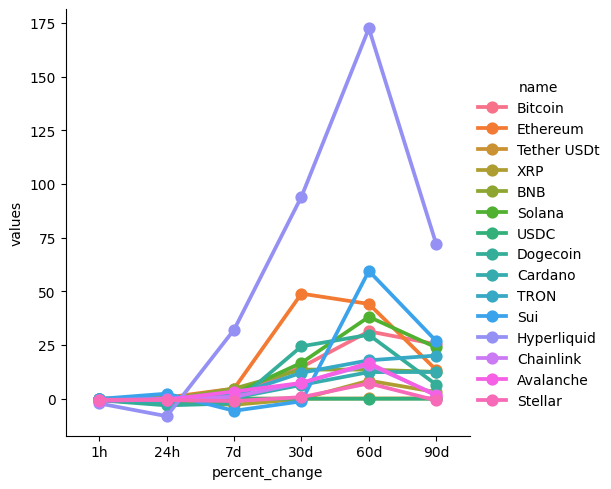

In [15]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [16]:
# Now to do something much simpler
# To create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,108521.097606,2025-05-28 19:31:19.307690


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

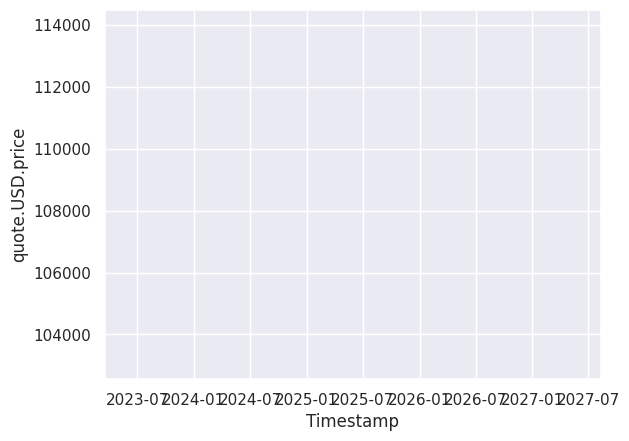

In [17]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)